In [178]:
import requests
import re
from bs4 import BeautifulSoup as BS
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from pprint import pprint

# Load/process transcript

In [179]:
def get_corpus(url):
    '''Pass in url. Retrieve content and return list of paragraphs.'''
    content = requests.get(url).text
    soup = BS(content, 'lxml')
    paragraphs = soup.find_all('p')
    paragraphs = [p.get_text() for p in paragraphs]
    corpus = ' '.join(paragraphs)
    return paragraphs

In [180]:
def view_tails(paragraphs, start=10, end=10):
    '''Pass in list of paragraphs and print out first 5 and last 5.
    Use to quickly check what needs to be trimmed.'''
    pprint(paragraphs[:start])
    print('\n')
    pprint(paragraphs[-end:])

In [205]:
def clean_corpus(paragraphs, trim_start=0, trim_end=0, delete=None, *args):
    '''Pass in list of paragraphs, # of paragraphs to drop from beginning
    and end, and tuples of format (to_replace, replace_with).'''
    trim_end = len(paragraphs) - trim_end
    if delete is not None:
        paragraphs = [p for p in paragraphs if p != delete]
    paragraphs = paragraphs[trim_start:trim_end]
    for arg in args:
        paragraphs = [p.replace(arg[0], arg[1]) for p in paragraphs]
    return paragraphs

In [182]:
def separate_speakers(paragraphs, *args):
    '''Pass in list of paragraphs and speaker names as strings. Return list 
    of paragraphs for each speaker.'''
    speaker_paragraphs = {}
    for arg in args:
        speaker_paragraphs[arg] = [p for p in paragraphs if p.startswith(arg)]
    speaker_paragraphs['unlabeled'] = [p for p in paragraphs 
                       if not any(p in ls for ls in speaker_paragraphs.values())]
    return speaker_paragraphs

In [212]:
a = ['abc', 'def', 'ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz']
b = [group for i, group in enumerate(a) if i % 2 == 0]
c = [group for i, group in enumerate(a) if i < 3 or i > 6]
a_dict = {'b': b,
         'c': c}
print(a_dict)
d = [group for group in a if not any(group in val for val in a_dict.values())]
print(d)

print(a_dict.values())

z = [i for i in range(20) if i > 5 and i < 15 and i % 2 == 0]
print(z)
def testing(*args):
    print(args)
testing(('a', 'b'), ('c', 'd'))

{'b': ['abc', 'ghi', 'mno', 'stu', 'yz'], 'c': ['abc', 'def', 'ghi', 'vwx', 'yz']}
['jkl', 'pqr']
dict_values([['abc', 'ghi', 'mno', 'stu', 'yz'], ['abc', 'def', 'ghi', 'vwx', 'yz']])
[6, 8, 10, 12, 14]
(('a', 'b'), ('c', 'd'))


In [196]:
url = r'https://erikamentari.wordpress.com/2018/02/27/jre-1070-jordan-peterson-transcript/'

content = requests.get(url).text
soup = BS(content, 'lxml')
paragraphs = soup.find_all('p')
paragraphs = [p.get_text().replace('Joe Rogan: ', 'Joe: ')\
              .replace('Dr Jordan B Peterson: ', "Jordan: ")\
              for p in paragraphs[8:-10]]
paragraph_text = ' '.join(paragraphs)

print('Paragraphs:', len(paragraphs))
print('Words:', len(paragraph_text))

Paragraphs: 611
Words: 163379


In [206]:
# IN PROGRESS - REPLACING ABOVE CELL WITH NEW FUNCTION CALLS
test_p = get_corpus(url)
cleaned_test = clean_corpus(test_p, 8, 10, None, ('Joe Rogan: ', 'Joe: '), 
                            ('Dr Jordan B Peterson: ', 'Jordan: '))
test_text = ' '.join(cleaned_test)

print(len(cleaned_test))
print(len(test_text))

test_dict = separate_speakers(cleaned_test, 'Joe:', 'Jordan:')
for key, val in test_dict.items():
    print(key, len(val))
cleaned_test == test_dict['unlabeled']

611
163379
Joe: 305
Jordan: 304
unlabeled 2


False

In [164]:
rogan_p = [p.replace('Joe:', '').strip() for p in paragraphs if p.startswith('Joe:')]
peterson_p = [p.replace('Jordan:', '').strip() for p in paragraphs if p.startswith('Jordan:')]
unlabeled = [p for p in paragraphs if not p.startswith('Joe:') and not p.startswith('Jordan:')]
rogan_p.insert(1, unlabeled.pop(0))

print('Rogan paragraph count:', len(rogan_p))
print('Peterson paragraph count:', len(peterson_p))
print('Unassigned text:', unlabeled)

Rogan paragraph count: 306
Peterson paragraph count: 304
Unassigned text: ['18:18']


In [4]:
rogan_words = ' '.join(rogan_p).split(' ')
peterson_words = ' '.join(peterson_p).split(' ')
rogan_count, peterson_count = len(rogan_words), len(peterson_words)
total_count = rogan_count + peterson_count
rogan_percent = rogan_count / total_count
peterson_percent = peterson_count / total_count

print('Total word count:', total_count)
print('Rogan word count:', rogan_count)
print('Peterson word count:', peterson_count)
print('% of conversation (Rogan): {}%'.format(round(100* rogan_percent, 2)))
print('% of conversation (Peterson): {}%'.format(round(100 * peterson_percent, 2)))

Total word count: 29119
Rogan word count: 6736
Peterson word count: 22383
% of conversation (Rogan): 23.13%
% of conversation (Peterson): 76.87%


In [5]:
common_rogan = Counter(rogan_words).most_common()
common_peterson = Counter(peterson_words).most_common()

print('Most common words (Rogan)\n\n' + str(common_rogan[:25]))
print('\nMost common words (Peterson)\n\n' + str(common_peterson[:25]))

Most common words (Rogan)

[('to', 187), ('of', 182), ('the', 178), ('I', 170), ('and', 157), ('a', 155), ('that', 145), ('you', 127), ('is', 126), ('this', 91), ('in', 87), ('people', 65), ('And', 64), ('what', 59), ('have', 59), ('it', 56), ('about', 53), ('think', 51), ('was', 50), ('are', 47), ('you’re', 42), ('not', 42), ('it’s', 41), ('with', 38), ('one', 35)]

Most common words (Peterson)

[('the', 868), ('to', 614), ('and', 524), ('you', 517), ('of', 498), ('a', 493), ('that', 466), ('I', 430), ('is', 291), ('in', 262), ('And', 244), ('it', 219), ('it’s', 195), ('like,', 189), ('that’s', 181), ('It’s', 174), ('what', 168), ('they', 156), ('have', 149), ('so', 144), ('was', 135), ('for', 134), ('people', 133), ('be', 128), ('do', 125)]


In [30]:
def replace_curly_quotes(*corpora):
    '''Pass in 1 or more corpora and replace all curly quotes
    with standard quotes.
    '''
    output = []
    for i, corpus in enumerate(corpora):
        new_corpus = corpus.replace("“", '"').replace("”", '"').replace("’", "'")
        output.append(new_corpus)
    return output

In [35]:
rogan_corpus = ' '.join(rogan_words)
peterson_corpus = ' '.join(peterson_words)

In [37]:
# replace curly quotes, then tokenize
rogan_corpus, peterson_corpus = replace_curly_quotes(rogan_corpus, peterson_corpus)
rogan_word_toke, rogan_p_toke = word_tokenize(rogan_corpus), sent_tokenize(rogan_corpus)
peterson_word_toke, peterson_p_toke = word_tokenize(peterson_corpus), sent_tokenize(peterson_corpus)

print('Rogan words: ' + str(len(rogan_word_toke)))
print('Peterson words: ' + str(len(peterson_word_toke)))

Rogan words: 7994
Peterson words: 27438


In [40]:
stop_words = stopwords.words('english')
rogan_word_toke = [w for w in rogan_word_toke if w.lower() not in stop_words]
peterson_word_toke = [w for w in peterson_word_toke if w.lower() not in stop_words]

print('Rogan words (stop words removed): ' + str(len(rogan_word_toke)))
print('Peterson words (stop words removed): ' + str(len(peterson_word_toke)))
print('\nRogan most common words:\n' + str(Counter(rogan_word_toke).most_common(25)))
print('\nPeterson most common words\n' + str(Counter(peterson_word_toke).most_common(25)))

Rogan words (stop words removed): 4200
Peterson words (stop words removed): 15085

Rogan most common words:
[('.', 449), (',', 368), ("'s", 148), ('people', 75), ("'re", 73), ('?', 62), ('think', 53), ('like', 45), ("n't", 45), ('one', 35), ('things', 30), (';', 25), ("'m", 24), ('Yeah', 24), ('Right', 23), ('know', 23), ('Yes', 22), ('get', 22), ('going', 22), ('mean', 21), ('way', 20), ("'ve", 20), ('saying', 19), ('right', 17), ('Well', 17)]

Peterson most common words
[(',', 1853), ('.', 1348), ("'s", 816), ('like', 308), ("n't", 230), ("'re", 200), ('?', 191), ('well', 165), (';', 163), ('people', 157), ('know', 150), ('think', 120), ('Yeah', 99), ('Well', 97), ('going', 94), ("'m", 84), ('right', 81), ('say', 80), ('things', 70), ('way', 65), ('want', 65), ('one', 61), ('life', 58), ('thing', 58), ('get', 58)]


In [9]:
rogan_tagged = nltk.pos_tag(rogan_word_toke)
peterson_tagged = nltk.pos_tag(rogan_word_toke)

In [10]:
def chunk(tagged):
    '''Pass in tagged word tokens and find chunks.'''
    chunk_gram = '''chunk_name: {<JJ.?>+<NN.?>+}'''
    chunk_parser = nltk.RegexpParser(chunk_gram)tj
    chunked = chunk_parser.parse(tagged)
    #chunked.draw()
    return chunked

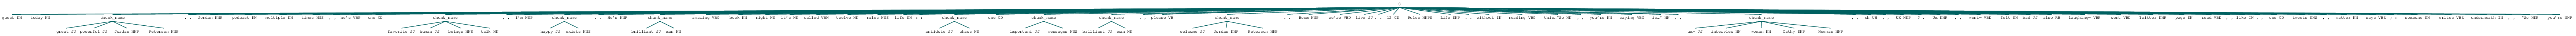

In [11]:
chunk(rogan_tagged[:100])

In [12]:
import string

print(string.punctuation)
remove_punct = str.maketrans(string.punctuation, ' '*len(string.punctuation))
a = 'abdlkja;c,3dk!.ejf}]dk'
print(a)
#b = 'abdlkja;c,3dk!.ejf}]dk'.remove(string.punctuation)
print(a.translate(remove_punct))
#print(b)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
abdlkja;c,3dk!.ejf}]dk
abdlkja c 3dk  ejf  dk


In [39]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Episode 877

In [68]:
content_2 = requests.get(
    'https://beyondhumannature.wordpress.com/2018/03/12/joe-rogan-experience-ep-877-with-jordan-peterson-transcript/'
).text
soup_2 = BS(content_2, 'lxml')
paragraphs_2 = soup_2.find_all('p')
len(paragraphs_2)

423

In [207]:
url2 = ('https://beyondhumannature.wordpress.com/2018/03/12/joe-rogan-experience'
        '-ep-877-with-jordan-peterson-transcript/')
raw_p2 = get_corpus(url_2)
p2 = clean_corpus(raw_p2, 11, 16, '\xa0')
texts = separate_speakers(p2, 'ROGAN: ', 'PETERSON: ')
print(len(raw_p2))
print(len(p2))
print(len(texts['ROGAN: ']))
print(len(texts['PETERSON: ']))
print(len(texts['unlabeled']))

423
396
174
174
48


In [198]:
for i, text in enumerate(texts['unlabeled']):
    print(i, text[:15])

0 [MUSIC 172:38]
1 But the initial
2 So for example,
3 But the Soviets
4 And I think wha
5 And then those 
6 Now, what happe
7 The underlying 
8 And people have
9 And people tend
10 So, here’s some
11 And it’s appall
12 The left descri
13 But the idea th
14 These people wh
15 And sometimes y
16 It was very biz
17 So everybody sa
18 Is it perfect? 
19 You know, it’s…
20 And then you st
21 Personality psy
22 And so, for exa
23 apparently this
24 And if anybody’
25 And their comma
26 And so that’s h
27 And so then the
28 So one of the t
29 I’m a clinical 
30 And so then you
31 That’s what you
32 And that’s what
33 And I think it’
34 […] Just go onl
35 And so you can 
36 You know, these
37 transsexual.
38 And the other t
